# Three-phase line analyzer for non-linear systems

In [48]:
import numpy as np
from daqthreephi import DataGen
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, irfft

In [173]:
def rmsValue(array):
    """
    This function gives the RMS value of an array (function or signal)
    :param array: an np array
    :return: the RMS value
    """
    quad_array = array ** 2
    rms = np.sqrt(np.mean(quad_array))

    return rms


def activePower(voltage, current):
    """
    This function calculate the active Power of a given voltage and current
    :param voltage: numpy voltages array
    :param current: numpy currents array
    :return: active power of the given arrays
    """
    instantPower = voltage * current
    actPower = np.mean(instantPower)

    return actPower


def reactivePower(voltage, current):
    """
    Calculate the reactive power of a line using the
    Fryze definition
    :param voltage: array with the voltages
    :param current: array with the currents
    :return: Fryze reactive Power
    """

    P = activePower(voltage, current)
    Irms = rmsValue(current)
    Vrms = rmsValue(voltage)
    S = Irms * Vrms
    Qf = np.sqrt(S ** 2 - P ** 2)

    return Qf


def getCoeffs(ft):
    """

    :param ft: numpy array with all the magnitudes of fft
    :return: array with the values of each armonic
    """
    steps = np.arange(0, len(ft), 5)
    coefs = np.zeros(len(steps))
    n = 0
    for i in steps:
        coefs[n] = ft[i]
        n += 1

    return coefs

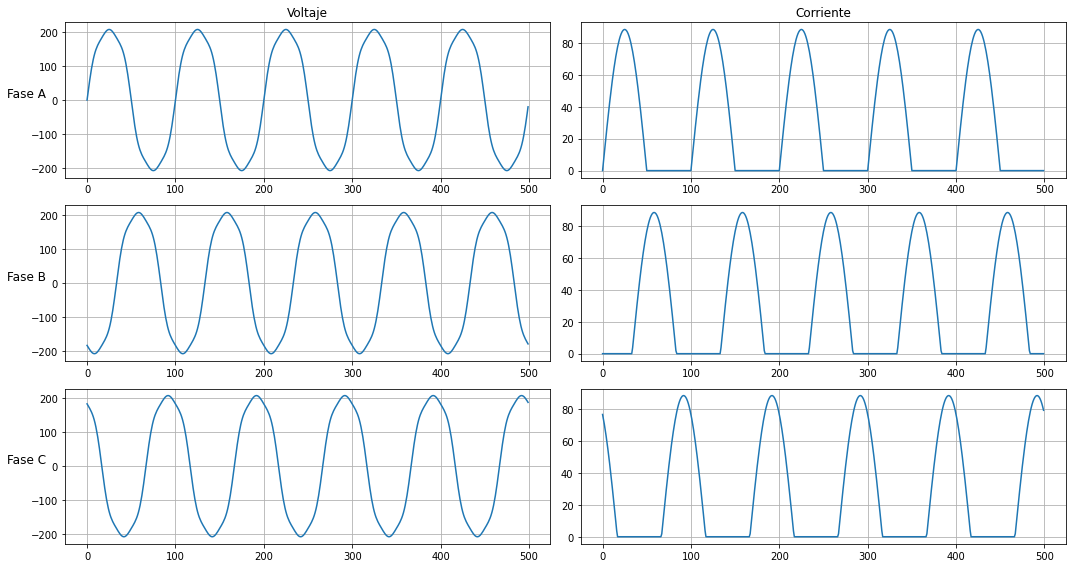

In [125]:
system = DataGen(69)
system.plot()

In [126]:
voltages, currents = system.get_data()

# Obtain every voltage and current value
v1 = voltages[0]
v2 = voltages[1]
v3 = voltages[2]

i1 = currents[0]
i2 = currents[1]
i3 = currents[2]

# Calculate the RMS value of the tensions and currents
v1_rms = round(rmsValue(v1), 4)
v2_rms = round(rmsValue(v2), 4)
v3_rms = round(rmsValue(v3), 4)

i1_rms = round(rmsValue(i1), 4)
i2_rms = round(rmsValue(i2), 4)
i3_rms = round(rmsValue(i3), 4)



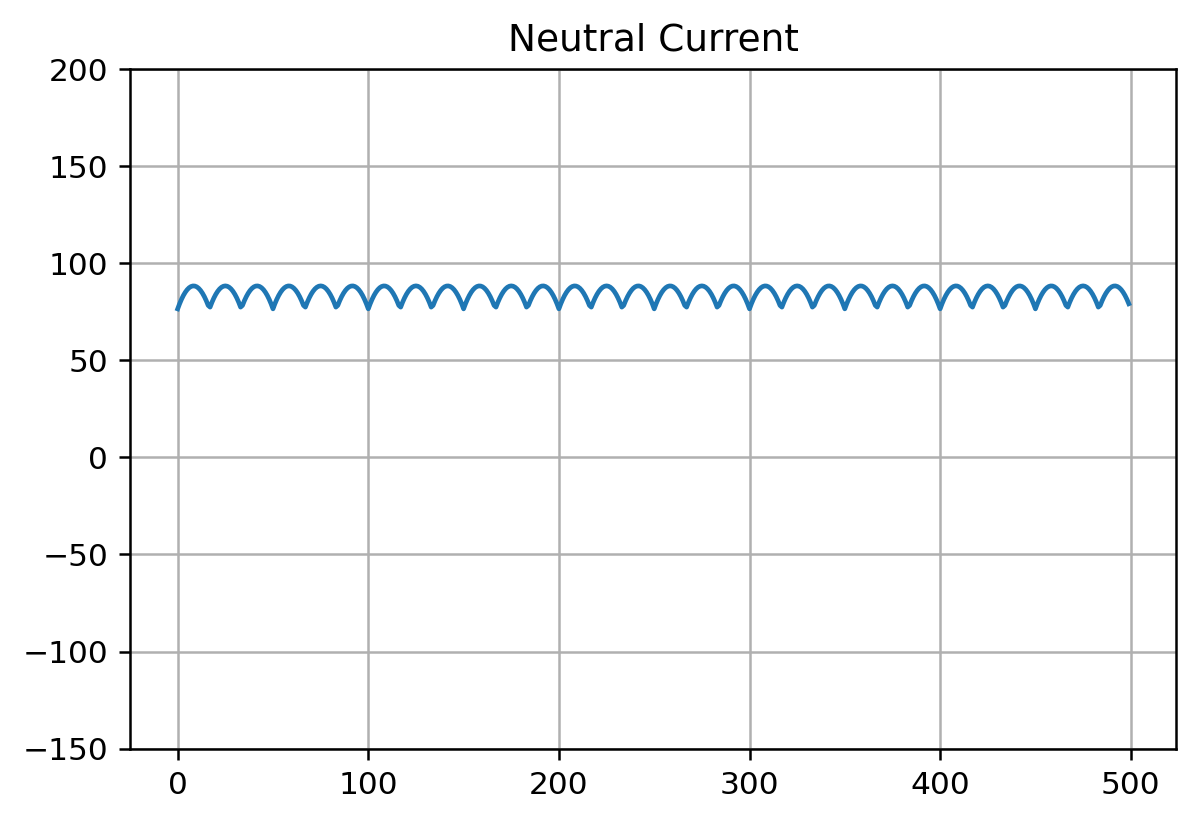

In [127]:
# Calculation and graph of the current in the neutral
i_n = i1 + i2 + i3

ticks = np.arange(-150, 201, 50)

plt.figure(dpi=225)
plt.plot(i_n)
plt.title("Neutral Current")
plt.yticks(ticks)
plt.grid()
plt.show()

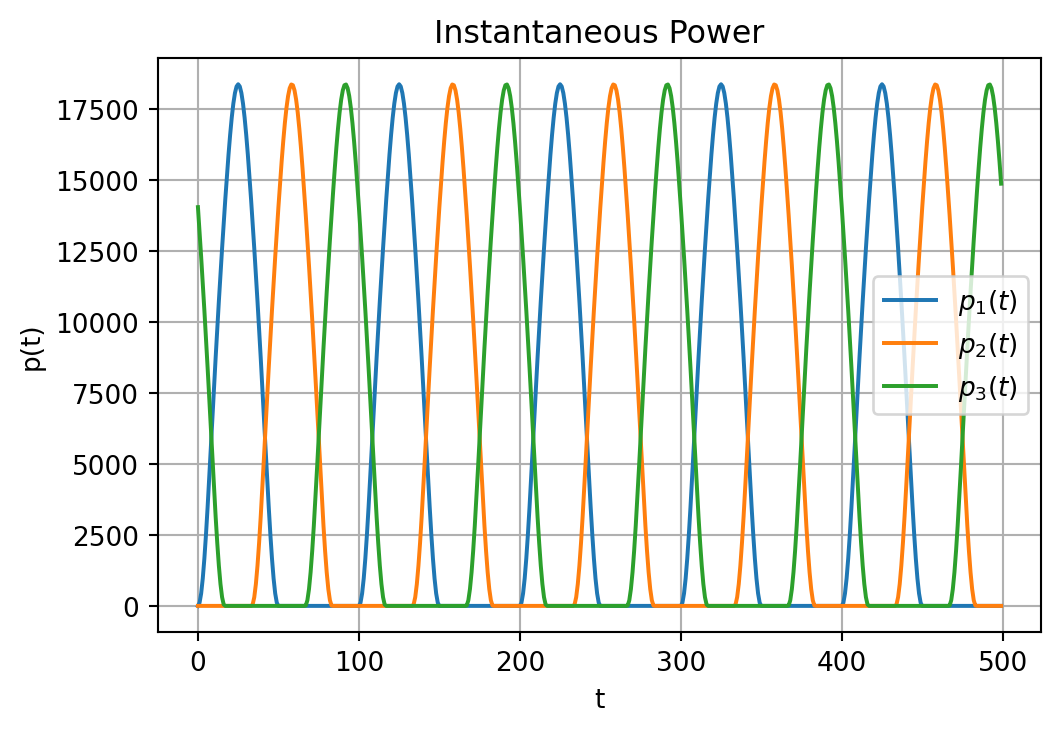

In [128]:
# Calculate the power of the system

# Instantaneous power
p1ins = v1 * i1
p2ins = v2 * i2
p3ins = v3 * i3

plt.figure(dpi=190)
plt.plot(p1ins, label="$p_1(t)$")
plt.plot(p2ins, label="$p_2(t)$")
plt.plot(p3ins, label="$p_3(t)$")
plt.legend()
plt.title("Instantaneous Power")
plt.xlabel("t")
plt.ylabel("p(t)")
plt.grid()
plt.show()

# Active power for each phase
p1 = activePower(v1, i1)
p2 = activePower(v2, i2)
p3 = activePower(v3, i3)

pt = p1 + p2 + p3

# Apparent power for each phase
s1 = v1_rms * i1_rms
s2 = v2_rms * i2_rms
s3 = v3_rms * i3_rms

# Fryze reactive power for each phase
q1 = reactivePower(v1, i1)
q2 = reactivePower(v2, i2)
q3 = reactivePower(v3, i3)

qt = q1 + q2 + q3

In [129]:
# Potencia fasorial del sistema
sfas = pt + qt * 1j
s_vector = np.array(pt, qt)
labels = ["P", "Qf"]
theta = np.angle(sfas, deg=True)
print(sfas)
print(round(theta), "°")


(14577.3073730555+14716.393238915392j)
45 °


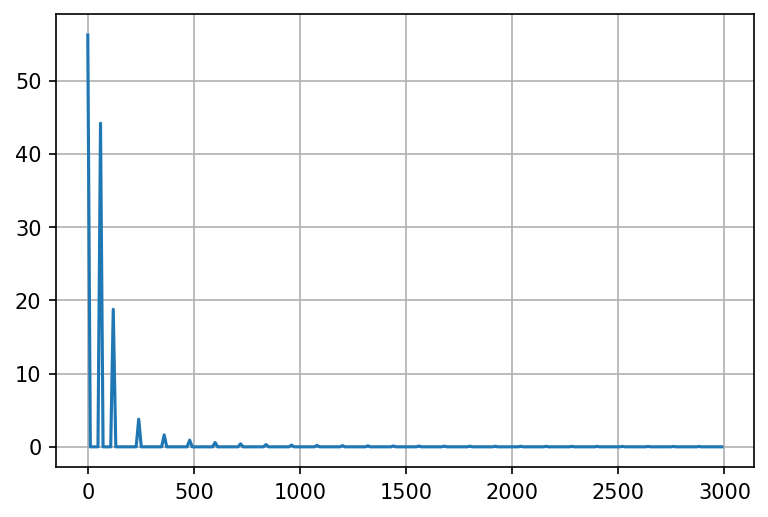

56.225144463924785

In [144]:
# Fast Fourier Transform
Fs = 6000  # Sample Frequency [Hz]
N = len(i1)  # Amount of data

yf = fft(i1)
yf = 2 / N * np.abs(yf[0:N // 2])
xf = fftfreq(N, 1 / Fs)[: N // 2]

plt.figure(dpi=150)
plt.plot(xf, yf)
tocks = np.arange(0, 101, 5)
plt.grid()
plt.show()



<Figure size 1200x800 with 0 Axes>

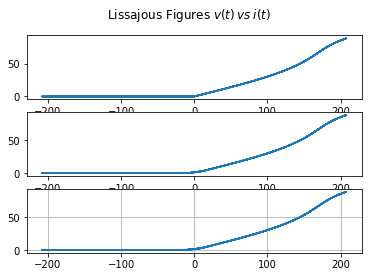

In [131]:
# This cell is used to test some concepts
plt.figure(dpi=200)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle("Lissajous Figures $v(t)\:vs\:i(t)$")
ax1.plot(v1, i1)
ax2.plot(v2, i2)
ax3.plot(v3, i3)
plt.grid()

plt.show()


In [174]:
a  = np.arange(0, len(yf), 5)
print(getCoeffs(yf))
for i in a:
    print(yf[i])


[5.62251445e+01 4.41736587e+01 1.87664023e+01 7.35494291e-15
 3.76813985e+00 5.47346447e-15 1.62559831e+00 3.13717920e-15
 9.11497166e-01 6.91559625e-15 5.86993468e-01 5.81505815e-15
 4.12355096e-01 3.77606470e-15 3.07672314e-01 4.02409011e-15
 2.40042179e-01 2.09520637e-15 1.93880255e-01 3.14494000e-15
 1.61024545e-01 5.10748025e-15 1.36863143e-01 3.69921951e-15
 1.18630436e-01 1.81898940e-15 1.04586798e-01 4.14101966e-15
 9.35943364e-02 2.56664875e-15 8.48842906e-02 8.74299983e-15
 7.79231705e-02 5.10219398e-15 7.23325125e-02 3.60409578e-15
 6.78390843e-02 3.77739546e-15 6.42430675e-02 3.45961966e-15
 6.13972301e-02 4.70228680e-15 5.91930329e-02 8.04524892e-15
 5.75512471e-02 1.57768817e-15 5.64156012e-02 4.45022741e-15
 5.57485400e-02 3.63975473e-15]
56.225144463924785
44.1736587062288
18.76640229340771
7.354942914110349e-15
3.7681398472508483
5.473464472010824e-15
1.62559831376321
3.137179195484147e-15
0.9114971663221778
6.91559625484863e-15
0.5869934675199618
5.8150581500924764e-1